# 2022-2023年度《Python程序设计》课程大作业

### 学号：<font color="red">2151094</font>
### 姓名：<font color="red">宋正非</font>
### 专业：<font color="red">土木工程</font>

## 作业要求：
- 完成一个桥梁管理系统的程序开发，具体为：
    - 完成Bridge类族的开发，包含Bridge及其派生类BeamBridge、CableStayedBridge、ArchBridge的编制
    - 完成River类的编制
    - 完成BMS管理系统类
- 各类的具体属性和方法如下:

- Bridge 类
     - 属性有：
         - mainspan 桥梁主跨跨径，数据类型为：float
         - spans   桥梁各个跨径，用列表存放 [float, float,...]
         - location 桥梁位置x和y坐标，数据类型为：(float, float)
         - builtyear桥梁建成年份，数据类型为：int
         - name    桥梁名称，数据类型为：str
         - id_     桥梁id，数据类型为：str
         - totallen 桥梁总长，根据spans求和得到
     - 构造函数参数列表：(self, id, name, mainspan, spans, location, builtyear):
     - print函数
- BeamBridge(Bridge)
     - 属性有：
         - mat       主梁材料，数据类型为：str   
         - statusscore  桥梁健康状况，数据类型为：float
     - 构造函数
     - print函数
     - evaluate函数，给桥梁健康状况打分(返回float类型数据，同时给statusscore赋值)
     - plot函数     
        - 在图片中显示一个桥梁位置
        - 标记桥梁名称
        - 标记桥梁健康状况
- CableStayedBridge(Bridge)
     - 属性有：
         - mat       主梁材料，数据类型为：str   
         - statusscore  桥梁健康状况，数据类型为：float
         - towerheight  桥塔高度，数据类型为：float
     - 构造函数
     - print函数
     - evaluate函数，给桥梁健康状况打分(返回float类型数据，同时给statusscore赋值)
     - plot函数     
        - 在图片中显示一个桥梁位置
        - 标记桥梁名称
        - 标记桥梁健康状况
- ArchBridge(Bridge)
     - 属性有：
         - mat       主梁材料，数据类型为：str   
         - statusscore  桥梁健康状况，数据类型为：float
         - archheight  拱肋高度，数据类型为：float
     - 构造函数
     - print函数
     - evaluate函数，给桥梁健康状况打分(返回float类型数据，同时给statusscore赋值)
     - plot函数     
        - 在图片中显示一个桥梁位置
        - 标记桥梁名称
        - 标记桥梁健康状况

- BMS 类，桥梁管理系统
     - 属性有：：
         - Bridge_list  存放桥梁列表，数据类型为：list
         - name 系统名称，数据类型为：str
     - 构造函数(self, name) name为信息系统名字
         - Bridge_list,设置列表为空
     - add_bridge(self, bridge:"Bridge or Bridge List"): 向系统中增加桥梁信息
         - 当bridge传入参数为单个对象时，则增加一个桥梁
         - 当bridge传入参数为对象列表时，则增加该桥梁列表中的全部元素
     - print(self) 输出桥梁信息
     - orderby(self, key='id_', reverse=False) 可以根据桥梁的信息排序

- River 类
     - 属性有：
         - rivercoord  河流的节点序列坐标数组，建议用numpy数组存放（数据需要从文件中读取），维度(num_node, 2)
         - name      河流名称，数据类型为：str   
     - 构造函数(self, filename,name)，filename为存放河流节点序列坐标的文件名，name为河流名称
     - plot函数     
        - 在图片中绘制河流
        - 标记河流名称
        

- 附加信息，便于同学了解
  - 斜拉桥:<https://baike.baidu.com/item/斜拉桥>
  - 拱桥:<https://baike.baidu.com/item/拱桥>
  - 梁桥:<https://baike.baidu.com/item/梁桥>

In [1]:
## 可能用到的模块
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
mpl.rcParams['font.sans-serif'] = ['SimHei']  # ['SimHei'] 或 ['FangSong'] 
mpl.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为小方块的问题，转换负号为字符串

In [2]:
## 完成一个桥例管理系统的类的编制
## 此处完成Bridge类
class Bridge():
    TotalNum = 0
    def __init__(self, id_="No name", name="Noname",mainspan=0, spans=[0,], location=(0,0), builtyear=2000):
        """
        id_ 桥梁编号
        name 桥名
        mainspan 主跨跨径
        span 跨径组合，比如100+200+100 以列表显示 [100,200,100]
        location 桥梁位置坐标，元组形式，如(123.4567,62)
        builtyear 建成年份
        """
        self.id_ = id_
        self.name = name
        self.mainspan = mainspan
        self.spans = spans
        self.location = location
        self.builtyear = builtyear
        self.totallen = sum(spans)

    def print(self):
        """
        输出桥梁的信息
        """
        print("桥梁编号为%s，桥名为%s，主跨跨径为%s，跨径组合为%s，桥梁总长为%s，位置坐标为%s，建成年份为%s"
              %(self.id_,self.name,self.mainspan,self.spans,self.totallen,self.location,self.builtyear))
        
    def plot(self):
        plt.plot(self.location[0], self.location[1], 'o', color='red')
        plt.text(self.location[0]+0.1, self.location[1]+0.5, str(self.name), fontsize=8)

In [3]:
## 完成一个桥例管理系统的类的编制
## 此处完成Bridge类的3个派生类
class BeamBridge(Bridge): #派生出梁桥BeamBridge，新增属性mat（材料类型），结构状态属性statusscore
    def __init__(self, id_="00001", name="Noname",mainspan=0, 
                 spans=[0,], location=(0,0), builtyear=2000,
                 mat="混凝土"):
        super().__init__(id_,name,mainspan,spans,location,builtyear)
        self.mat = mat
        self.statusscore = 0
     
    def evaluate(self, sc=0):
        """给桥梁状态打分，0~100分"""
        self.statusscore = float(sc)
        return sc
       
    def print(self):
        print("桥梁编号为%s，桥名为%s，主跨跨径为%s，跨径组合为%s，桥梁总长为%s，位置坐标为%s，建成年份为%s，材料为%s，结构状态属性为%s"%(self.id_,self.name,self.mainspan,self.spans,self.totallen,self.location,self.builtyear,self.mat,self.statusscore))
        
    def plot(self):
        plt.plot(self.location[0], self.location[1], 'o', color='blue')
        plt.text(self.location[0]+0.1, self.location[1]+0.5, str(self.name), fontsize=8)
        plt.text(self.location[0]+1, self.location[1]-0.5, str("%.2f"%self.statusscore), fontsize=8)
            

class CableStayedBridge(Bridge): 
    #派生出斜拉桥CableStayedBridge，
    #新增属性mat（材料类型），结构状态属性statusscore
    #桥塔
    def __init__(self, id_="00001", name="Noname",mainspan=0, 
                 spans=[0,], location=(0,0), builtyear=2000,
                 mat="钢结构", towerheight=0):
        super().__init__(id_,name,mainspan,spans,location,builtyear)
        self.mat = mat
        self.statusscore = 0
        self.towerheight = towerheight
    
    def evaluate(self, sc=0):
        """给桥梁状态打分，0~100分"""
        self.statusscore = float(sc)
        return sc
       
    def print(self):
        print("桥梁编号为%s，桥名为%s，主跨跨径为%s，跨径组合为%s，桥梁总长为%s，位置坐标为%s，建成年份为%s，材料为%s，结构状态属性为%s,塔桥高度%s"%(self.id_,self.name,self.mainspan,self.spans,self.totallen,self.location,self.builtyear,self.mat,self.statusscore,self.towerheight))
    
    def plot(self):
        plt.plot(self.location[0], self.location[1], 'o', color='green')
        plt.text(self.location[0]+0.1, self.location[1]+0.5, str(self.name), fontsize=8)
        plt.text(self.location[0]+1, self.location[1]-0.5, str("%.2f"%self.statusscore), fontsize=8)

        
class ArchBridge(Bridge): 
    #派生出拱桥ArchBridge，
    #新增属性mat（材料类型），结构状态属性statusscore
    #拱肋
    def __init__(self, id_="00001", name="Noname",mainspan=0, 
                 spans=[0,], location=(0,0), builtyear=2000,
                 mat="钢结构", archheight=0):
        super().__init__(id_,name,mainspan,spans,location,builtyear)
        self.mat = mat
        self.statusscore = 0
        self.archheight = archheight
    
    def evaluate(self, sc=0):
        """给桥梁状态打分，0~100分"""
        self.statusscore = float(sc)
        return sc
        
    def print(self):
        print("桥梁编号为%s，桥名为%s，主跨跨径为%s，跨径组合为%s，桥梁总长为%s，位置坐标为%s，建成年份为%s，材料为%s，结构状态属性为%s，拱肋高度%s"%(self.id_,self.name,self.mainspan,self.spans,self.totallen,self.location,self.builtyear,self.mat,self.statusscore,self.archheight))
        
    def plot(self):
        plt.plot(self.location[0], self.location[1], 'o', color='orange')
        plt.text(self.location[0]+0.1, self.location[1]-0.5, str(self.name), fontsize=8)
        plt.text(self.location[0]+1, self.location[1]-1.5, str("%.2f"%self.statusscore), fontsize=8)
    

In [4]:
## 完成一个桥例管理系统的类的编制
## 此处完成River类
class River():
    # 河流对象
    def __init__(self, filename:str, name:str):
        self.rivercoord = np.loadtxt(filename)  
        self.name = name
        
    def plot(self):
        plt.xlim(-0.5, 39)
        plt.ylim(-2.5, 25.5)
        data = self.rivercoord.flatten()
        x = data[::2]
        y = data[1::2]
        plt.plot(x,y)
        plt.text(x[-1]-1, y[-1], str(self.name), fontsize=10, color='red')

In [5]:
## 完成一个桥例管理系统的类的编制
## 此处完成BMS类
class BMS():
    """桥梁系统"""
    def __init__(self, name): #信息系统名字
        self.name = name
        self.Bridge_list = []
        
    def add_bridge(self, bridge:"Bridge or Bridge List"):
        if isinstance(bridge,list):
            for each in bridge:
                self.Bridge_list.append(each)
        else:
            self.Bridge_list.append(bridge)
            
    def print(self):          
        print("---------------------------",self.name,"-----------------------------")
        print("%5s%6s%8s%10s%6s%6s%6s%6s"%("桥名","编号","主跨跨径(m)","全长(m)","桥型","建成年","主梁材料","状态得分"))
        print("----------------------------------------------------------------------------")
        for each in self.Bridge_list:
            if isinstance(each,BeamBridge):
                bridgetype="梁"+chr(12288)+"桥"
            if isinstance(each,CableStayedBridge):
                bridgetype="斜拉桥"
            if isinstance(each,ArchBridge):
                bridgetype="拱"+chr(12288)+"桥"
            print("%5s%6s%10d%10d%10s%8d%6s%6d"
                  %(each.name,each.id_,each.mainspan,each.totallen,bridgetype,each.builtyear,each.mat,each.statusscore))
        print("-----------------------------------END--------------------------------------")
        
    def orderby(self, key='id_', reverse=False):
        self.Bridge_list.sort(key=lambda x: getattr(x,key),reverse=reverse)

In [6]:
### 此格代码请勿改动
### 此格用于输入各个桥梁信息
b1 = BeamBridge("0001","外白渡桥",100,[100, 100],(18.5,10.5),1878,mat="钢桁架")
b2 = BeamBridge("0002","浙江路桥", 60,[35,60,35],(17.7,12.9),1978,mat="混凝土")
b3 = BeamBridge("0006","西藏路桥", 75,[38,75,38],(17.6,16.8),1983,mat="混凝土")
b4 = BeamBridge("0007","四川路桥", 55,[28,55,28],(15.4,19.1),1981,mat="混凝土")
c1 = CableStayedBridge("0003", "杨浦大桥",608,[250,608,250],(32.3,10.1), 2000,"钢结构", towerheight=150)
c2 = CableStayedBridge("0004", "南浦大桥",408,[150,408,150],(20.2,7.02), 1996,"钢结构", towerheight=120)
c3 = CableStayedBridge("0008", "徐浦大桥",624,[250,624,250],(12.3,9.05), 2004,"钢与砼", towerheight=170)
c4 = CableStayedBridge("0009", "闵浦大桥",708,[280,708,280],(9.10,11.4), 2014,"钢桁架", towerheight=180)
c5 = CableStayedBridge("0010", "闵浦二桥",308,[ 80,100,308],(4.10,10.3), 2017,"钢桁架", towerheight=120)
a1 = ArchBridge("0005", "卢浦大桥",550,[100,550,100], (14.2,8.02), 2000,"钢结构", archheight=110)


In [7]:
### 此格代码请勿改动
### 此格用于输入各个桥梁管理信息所需要的信息
bms = BMS("上海市桥梁管理系统")
bms.add_bridge(a1) # 可以每次增加一个桥梁
bms.add_bridge(b1) # 可以每次增加一个桥梁
bms.add_bridge([b2, b3, b4, c1, c2, c3, c4, c5]) # 可以一次向系统里面增加很多桥梁，用列表作为参数
for ib in bms.Bridge_list: #给每个桥梁增加评分
    ib.evaluate(random.randint(60, 95))
bms.print()  # 输出系统中所有桥梁

--------------------------- 上海市桥梁管理系统 -----------------------------
   桥名    编号 主跨跨径(m)     全长(m)    桥型   建成年  主梁材料  状态得分
----------------------------------------------------------------------------
 卢浦大桥  0005       550       750       拱　桥    2000   钢结构    90
 外白渡桥  0001       100       200       梁　桥    1878   钢桁架    82
 浙江路桥  0002        60       130       梁　桥    1978   混凝土    78
 西藏路桥  0006        75       151       梁　桥    1983   混凝土    60
 四川路桥  0007        55       111       梁　桥    1981   混凝土    61
 杨浦大桥  0003       608      1108       斜拉桥    2000   钢结构    80
 南浦大桥  0004       408       708       斜拉桥    1996   钢结构    63
 徐浦大桥  0008       624      1124       斜拉桥    2004   钢与砼    83
 闵浦大桥  0009       708      1268       斜拉桥    2014   钢桁架    67
 闵浦二桥  0010       308       488       斜拉桥    2017   钢桁架    92
-----------------------------------END--------------------------------------


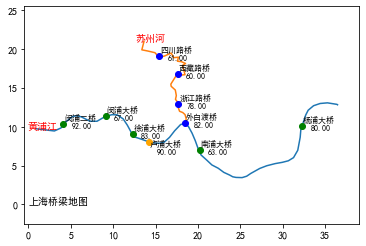

In [8]:
### 此格代码请不要改变 
### 用于展示全部桥梁信息
r1 = River(filename="river01.dat",name="黄浦江")  # 定义第一条河流
r2 = River(filename="river02.dat",name="苏州河")  # 定义第二条河流
rivers = [r1, r2] 

plt.figure()  #建立画布
for ir in rivers: #绘制河流
    ir.plot()

for ib in bms.Bridge_list: #将每座桥绘制在地图上
    ib.plot()
    
plt.text(0,0,"上海桥梁地图") 
plt.show()

In [ ]:
# 此格请勿改动
bms.orderby('id_')  # 按照id_对桥梁进行排序
bms.print()

In [ ]:
# 此格请勿改动
bms.orderby('statusscore')# 按照评分对桥梁进行排序
bms.print()

In [173]:
# 此格请勿改动
bms.orderby('mainspan',True)# 按照主跨跨径对桥梁进行排序
bms.print()

--------------------------- 上海市桥梁管理系统 -----------------------------
   桥名    编号 主跨跨径(m)     全长(m)    桥型   建成年  主梁材料  状态得分
----------------------------------------------------------------------------
 闵浦大桥  0009       708      1268       斜拉桥    2014   钢桁架    65
 徐浦大桥  0008       624      1124       斜拉桥    2004   钢与砼    91
 杨浦大桥  0003       608      1108       斜拉桥    2000   钢结构    66
 卢浦大桥  0005       550       750       拱　桥    2000   钢结构    75
 南浦大桥  0004       408       708       斜拉桥    1996   钢结构    73
 闵浦二桥  0010       308       488       斜拉桥    2017   钢桁架    90
 外白渡桥  0001       100       200       梁　桥    1878   钢桁架    78
 西藏路桥  0006        75       151       梁　桥    1983   混凝土    80
 浙江路桥  0002        60       130       梁　桥    1978   混凝土    85
 四川路桥  0007        55       111       梁　桥    1981   混凝土    84
-----------------------------------END--------------------------------------


In [174]:
# 此格请勿改动
bms.orderby('builtyear',True) # 按照建成年份对桥梁进行排序
bms.print()

--------------------------- 上海市桥梁管理系统 -----------------------------
   桥名    编号 主跨跨径(m)     全长(m)    桥型   建成年  主梁材料  状态得分
----------------------------------------------------------------------------
 闵浦二桥  0010       308       488       斜拉桥    2017   钢桁架    90
 闵浦大桥  0009       708      1268       斜拉桥    2014   钢桁架    65
 徐浦大桥  0008       624      1124       斜拉桥    2004   钢与砼    91
 杨浦大桥  0003       608      1108       斜拉桥    2000   钢结构    66
 卢浦大桥  0005       550       750       拱　桥    2000   钢结构    75
 南浦大桥  0004       408       708       斜拉桥    1996   钢结构    73
 西藏路桥  0006        75       151       梁　桥    1983   混凝土    80
 四川路桥  0007        55       111       梁　桥    1981   混凝土    84
 浙江路桥  0002        60       130       梁　桥    1978   混凝土    85
 外白渡桥  0001       100       200       梁　桥    1878   钢桁架    78
-----------------------------------END--------------------------------------
